In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('train_data_0.csv')

In [3]:
data.head()

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,0,1,18,9,2,3,16,10,11,3,...,3,3,3,4,1,3,4,1,0,0
1,0,2,18,9,14,14,12,12,0,3,...,0,0,0,4,1,3,4,1,0,0
2,0,3,18,9,4,8,1,11,11,0,...,0,0,0,4,1,2,3,1,1,1
3,0,4,4,1,9,12,16,7,12,2,...,3,3,3,4,1,3,1,1,0,0
4,0,5,5,12,15,2,11,12,10,2,...,3,3,3,4,1,3,4,1,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974724 entries, 0 to 1974723
Data columns (total 61 columns):
 #   Column                         Dtype
---  ------                         -----
 0   id                             int64
 1   rn                             int64
 2   pre_since_opened               int64
 3   pre_since_confirmed            int64
 4   pre_pterm                      int64
 5   pre_fterm                      int64
 6   pre_till_pclose                int64
 7   pre_till_fclose                int64
 8   pre_loans_credit_limit         int64
 9   pre_loans_next_pay_summ        int64
 10  pre_loans_outstanding          int64
 11  pre_loans_total_overdue        int64
 12  pre_loans_max_overdue_sum      int64
 13  pre_loans_credit_cost_rate     int64
 14  pre_loans5                     int64
 15  pre_loans530                   int64
 16  pre_loans3060                  int64
 17  pre_loans6090                  int64
 18  pre_loans90                    int64
 19  

In [5]:
# statiscal data
data.describe()

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
count,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,...,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06
mean,1.259465e+05,6.537471e+00,9.271325e+00,8.330264e+00,8.299071e+00,8.309444e+00,6.991781e+00,8.337011e+00,9.740888e+00,2.399848e+00,...,2.313242e+00,2.343014e+00,2.376717e+00,3.576724e+00,1.027562e+00,2.694898e+00,3.353936e+00,1.002386e+00,1.721385e-01,2.239336e-01
std,7.226981e+04,5.121167e+00,5.773757e+00,4.593511e+00,5.245598e+00,4.464844e+00,5.184165e+00,4.233992e+00,5.799625e+00,1.376391e+00,...,1.247674e+00,1.228473e+00,1.205555e+00,1.035586e+00,2.767022e-01,4.891363e-01,1.057304e+00,5.909327e-02,3.775009e-01,4.168782e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.344100e+04,3.000000e+00,4.000000e+00,5.000000e+00,4.000000e+00,6.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00,2.000000e+00,...,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.263750e+05,5.000000e+00,9.000000e+00,9.000000e+00,8.000000e+00,8.000000e+00,6.000000e+00,1.000000e+01,1.000000e+01,2.000000e+00,...,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,1.889970e+05,9.000000e+00,1.400000e+01,1.100000e+01,1.300000e+01,1.200000e+01,1.200000e+01,1.100000e+01,1.500000e+01,2.000000e+00,...,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,2.499990e+05,5.100000e+01,1.900000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.500000e+01,1.900000e+01,6.000000e+00,...,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00,6.000000e+00,5.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00


In [6]:
data.describe().astype(int)

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
count,1974724,1974724,1974724,1974724,1974724,1974724,1974724,1974724,1974724,1974724,...,1974724,1974724,1974724,1974724,1974724,1974724,1974724,1974724,1974724,1974724
mean,125946,6,9,8,8,8,6,8,9,2,...,2,2,2,3,1,2,3,1,0,0
std,72269,5,5,4,5,4,5,4,5,1,...,1,1,1,1,0,0,1,0,0,0
min,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
25%,63441,3,4,5,4,6,1,5,5,2,...,3,3,3,4,1,2,3,1,0,0
50%,126375,5,9,9,8,8,6,10,10,2,...,3,3,3,4,1,3,4,1,0,0
75%,188997,9,14,11,13,12,12,11,15,2,...,3,3,3,4,1,3,4,1,0,0
max,249999,51,19,17,17,16,16,15,19,6,...,3,3,3,4,6,6,5,3,1,1


In [7]:
#finding missing values
data.isnull().sum()

id                         0
rn                         0
pre_since_opened           0
pre_since_confirmed        0
pre_pterm                  0
                          ..
enc_loans_credit_status    0
enc_loans_credit_type      0
enc_loans_account_cur      0
pclose_flag                0
fclose_flag                0
Length: 61, dtype: int64

In [8]:
data.shape

(1974724, 61)

In [9]:
data.size

120458164

In [10]:
data.nunique()

id                         250000
rn                             51
pre_since_opened               20
pre_since_confirmed            18
pre_pterm                      18
                            ...  
enc_loans_credit_status         7
enc_loans_credit_type           6
enc_loans_account_cur           4
pclose_flag                     2
fclose_flag                     2
Length: 61, dtype: int64

In [11]:
data.columns

Index(['id', 'rn', 'pre_since_opened', 'pre_since_confirmed', 'pre_pterm',
       'pre_fterm', 'pre_till_pclose', 'pre_till_fclose',
       'pre_loans_credit_limit', 'pre_loans_next_pay_summ',
       'pre_loans_outstanding', 'pre_loans_total_overdue',
       'pre_loans_max_overdue_sum', 'pre_loans_credit_cost_rate', 'pre_loans5',
       'pre_loans530', 'pre_loans3060', 'pre_loans6090', 'pre_loans90',
       'is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060',
       'is_zero_loans6090', 'is_zero_loans90', 'pre_util', 'pre_over2limit',
       'pre_maxover2limit', 'is_zero_util', 'is_zero_over2limit',
       'is_zero_maxover2limit', 'enc_paym_0', 'enc_paym_1', 'enc_paym_2',
       'enc_paym_3', 'enc_paym_4', 'enc_paym_5', 'enc_paym_6', 'enc_paym_7',
       'enc_paym_8', 'enc_paym_9', 'enc_paym_10', 'enc_paym_11', 'enc_paym_12',
       'enc_paym_13', 'enc_paym_14', 'enc_paym_15', 'enc_paym_16',
       'enc_paym_17', 'enc_paym_18', 'enc_paym_19', 'enc_paym_20',
       'enc_paym_21', 

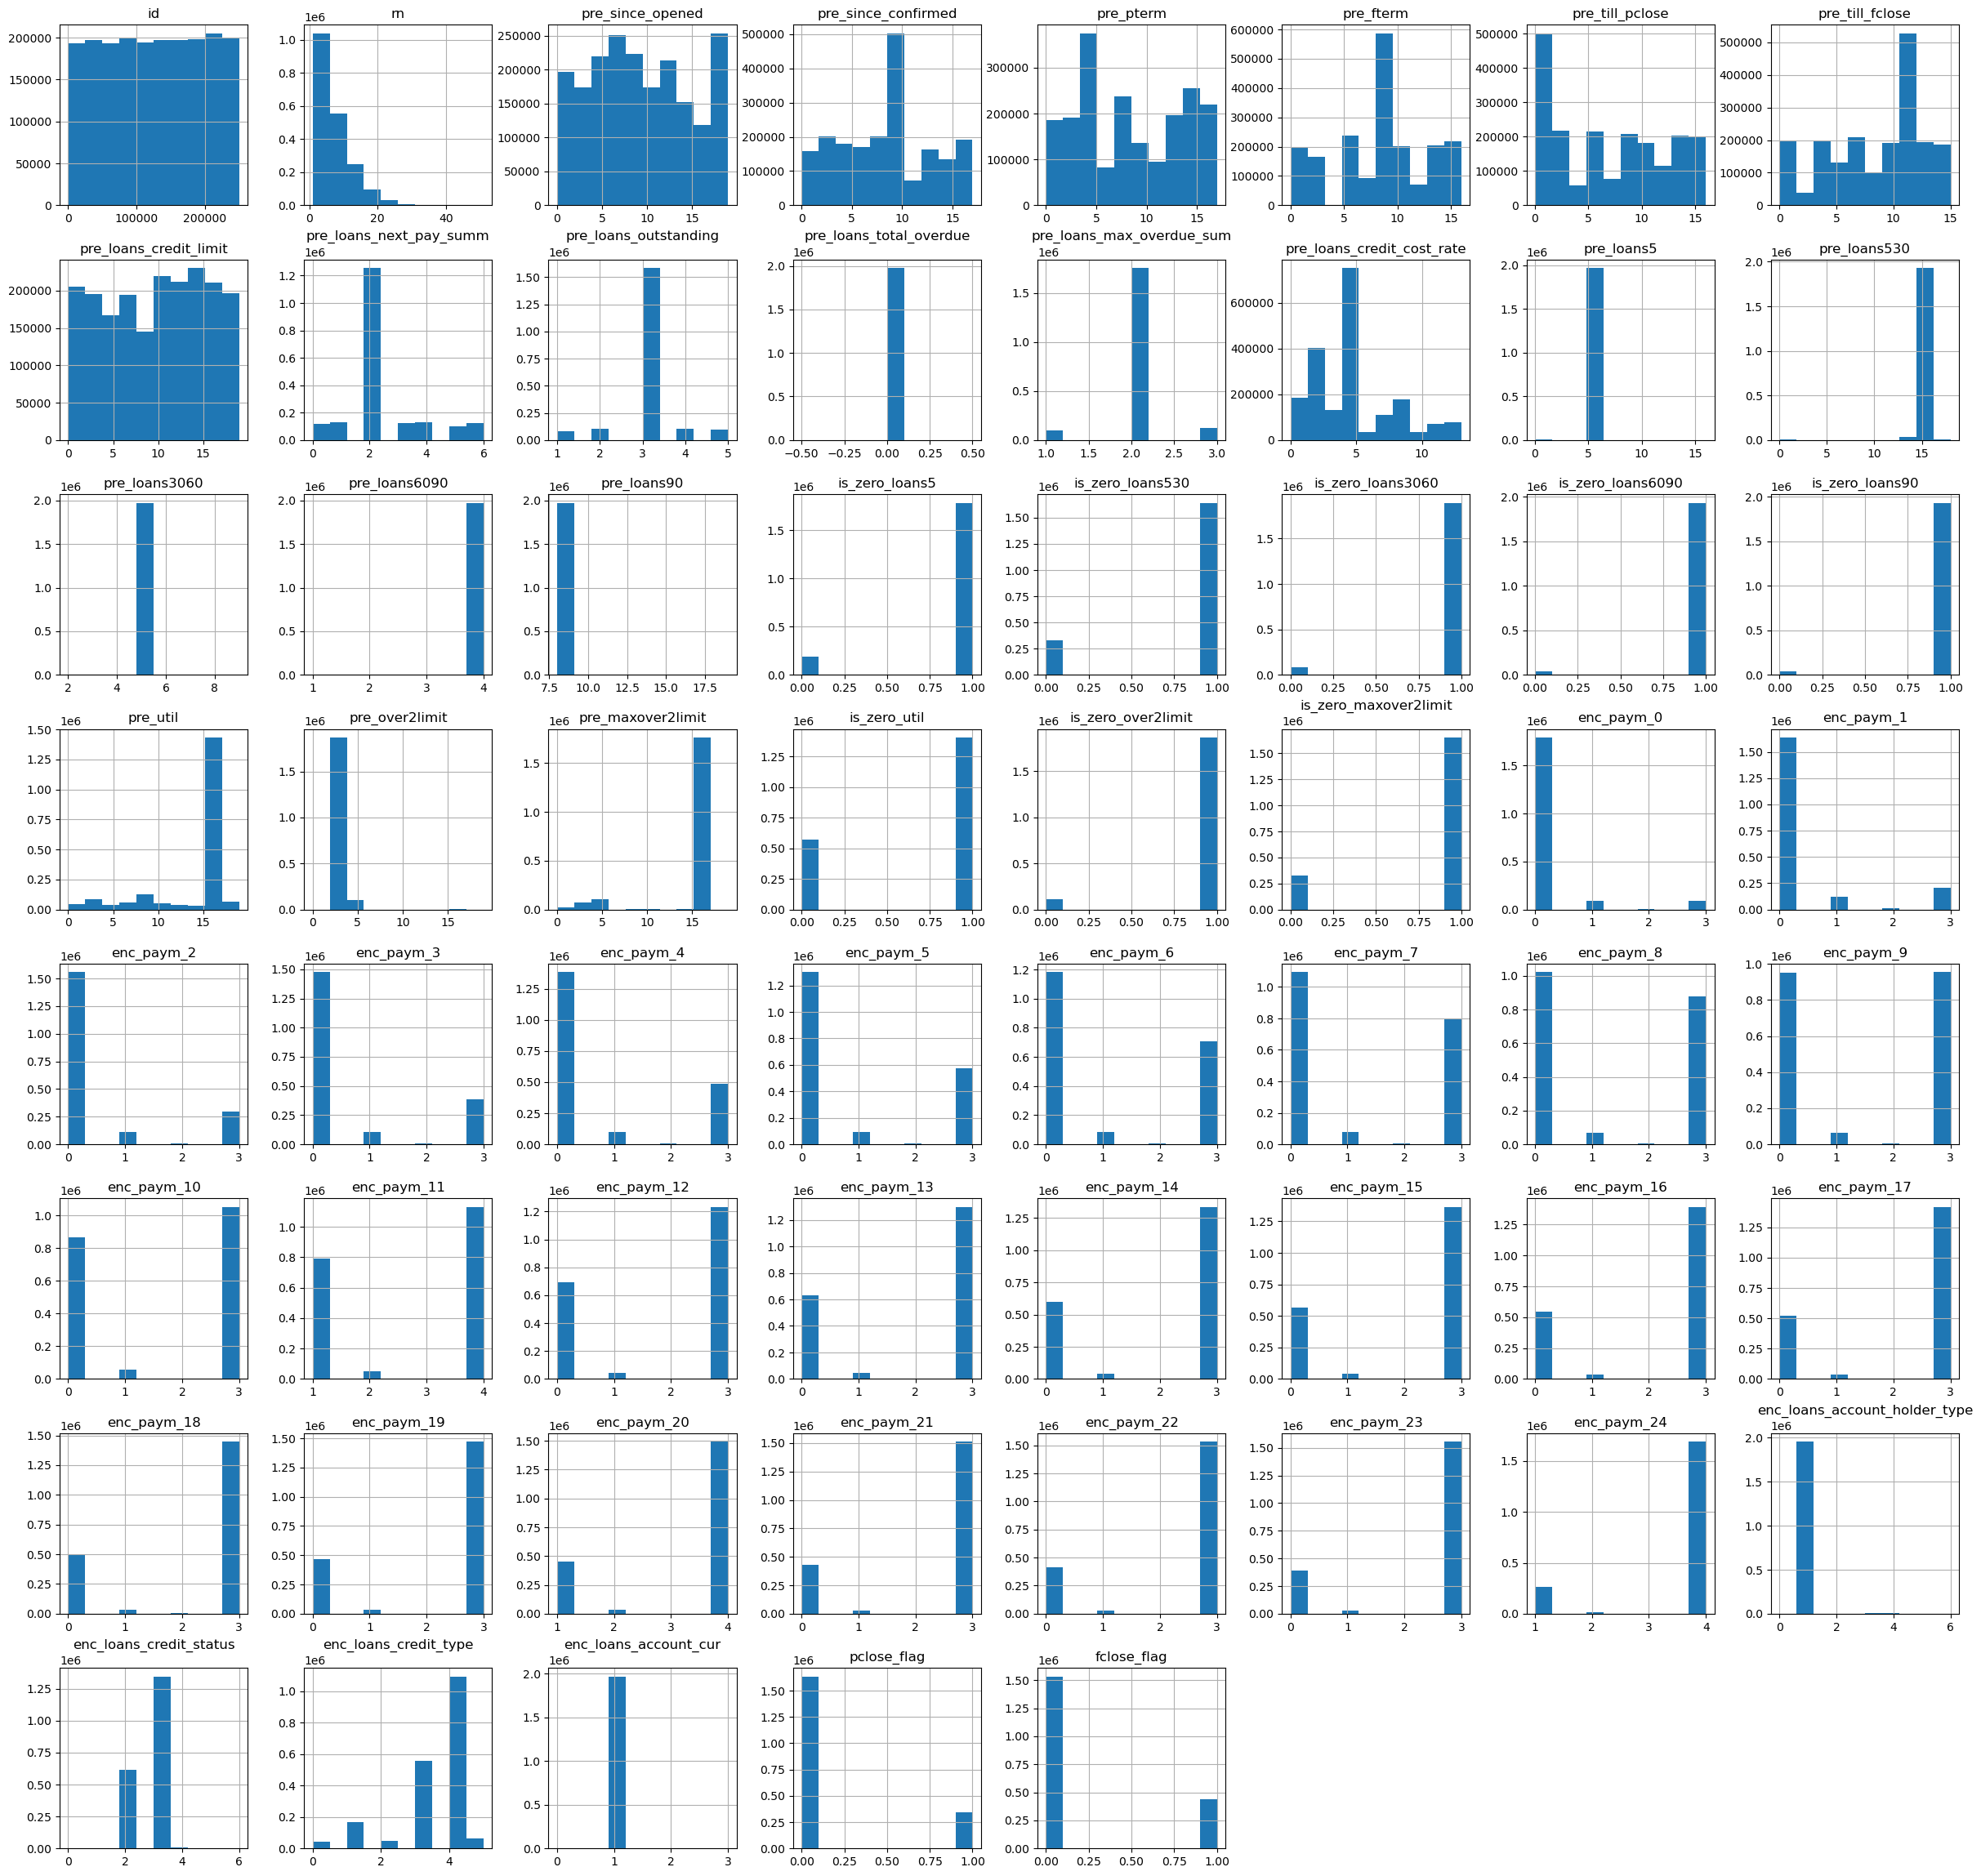

In [12]:
data.hist( figsize = (30, 29) )
plt.show()

In [13]:
data['id'].nunique()

250000

In [14]:
data.nunique()

id                         250000
rn                             51
pre_since_opened               20
pre_since_confirmed            18
pre_pterm                      18
                            ...  
enc_loans_credit_status         7
enc_loans_credit_type           6
enc_loans_account_cur           4
pclose_flag                     2
fclose_flag                     2
Length: 61, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Feature Scaling - Standardize the features
scaler = StandardScaler()
# Exclude the 'id' column and target variables 'pclose_flag' and 'fclose_flag' from scaling
features_to_scale = data.drop(columns=['id', 'pclose_flag', 'fclose_flag'])
scaled_features = scaler.fit_transform(features_to_scale)

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    scaled_features,
    data[['pclose_flag', 'fclose_flag']],  # Assuming these are the target variables
    test_size=0.2,  # 80% training and 20% validation
    random_state=42
)

In [16]:
# Preprocessed data
X_train[:5], y_train[:5]

(array([[-3.00218984e-01, -5.66585250e-01,  1.45800397e-01,
         -8.19557981e-01, -6.93067536e-02, -1.15578545e+00,
          6.28954871e-01, -1.33472264e+00,  1.88910886e+00,
          1.44338250e+00,  0.00000000e+00, -3.61827770e-02,
         -5.11029373e-01,  6.04452247e-02,  1.08323545e-01,
         -1.48312387e-02,  4.43783360e-03, -1.33548342e-02,
          3.24147263e-01,  4.49855266e-01,  2.07446225e-01,
          1.47838736e-01,  1.45360721e-01,  4.76367954e-01,
         -2.11103269e-01,  3.40184841e-01, -1.56967742e+00,
          2.45109411e-01,  4.42736889e-01, -2.84273272e-01,
         -4.12146431e-01, -4.80714472e-01, -5.46528565e-01,
         -6.19928793e-01, -6.87772822e-01, -7.87841194e-01,
         -8.66806042e-01, -9.36151414e-01, -1.00585229e+00,
         -1.10507197e+00, -1.19471027e+00, -1.32903614e+00,
         -1.42540442e+00, -1.48718090e+00, -1.53926769e+00,
         -1.58990843e+00, -1.64047746e+00, -1.70234172e+00,
         -1.75505698e+00, -1.80458131e+0

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Assuming 'pclose_flag' is the target variable for a binary classification task
y_train_binary = y_train['pclose_flag']
y_val_binary = y_val['pclose_flag']

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train_binary)

# Predict on the validation set
val_predictions = model.predict(X_val)

# Evaluate the model
roc_auc = roc_auc_score(y_val_binary, val_predictions)

# Print ROC AUC score
print(f'The ROC AUC score on the validation set is: {roc_auc}')

The ROC AUC score on the validation set is: 0.9351967979639837


In [18]:
# Predict probabilities on the validation set
val_probabilities = model.predict_proba(X_val)[:, 1]  # get the probabilities of the positive class

# Recalculate ROC AUC score using probabilities
roc_auc = roc_auc_score(y_val_binary, val_probabilities)

# Print the corrected ROC AUC score
print(f'The corrected ROC AUC score on the validation set is: {roc_auc}')

The corrected ROC AUC score on the validation set is: 0.9793742292398528


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the hyperparameter grid to search
param_distribution = {
    'C': uniform(loc=0, scale=4),  # Regularization strength
    'penalty': ['l2'],  # The norm of the penalty (l1 is not supported by the 'lbfgs' solver)
    'class_weight': [None, 'balanced'],  # Weights associated with classes
    'max_iter': [100, 200, 300]  # Number of iterations
}

# Initialize the model
model = LogisticRegression(solver='lbfgs')

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distribution,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=3,  # Number of folds in cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Number of jobs to run in parallel
)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train_binary)

# Print the best parameters and the best score
print("Best Parameters found: ", random_search.best_params_)
print("Best ROC AUC found: ", random_search.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
# Retrieve the best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Get the feature importances (the coefficients in the case of logistic regression)
importance = best_model.coef_[0]

# Summarize feature importances
feature_names = data.drop(columns=['id', 'pclose_flag', 'fclose_flag']).columns
feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importance
}).sort_values('importance', ascending=False)

print(feature_importances)

In [ ]:
## model evaluation
from sklearn.metrics import confusion_matrix, classification_report

# Predict class labels on the validation set
val_predictions = best_model.predict(X_val)

# Predict class probabilities on the validation set
val_probabilities = best_model.predict_proba(X_val)[:, 1]

# Confusion matrix
print(confusion_matrix(y_val_binary, val_predictions))

# Classification report
print(classification_report(y_val_binary, val_predictions))

# ROC AUC score using probabilities
roc_auc = roc_auc_score(y_val_binary, val_probabilities)
print(f'The ROC AUC score on the validation set is: {roc_auc}')


In [ ]:
## cross validation
from sklearn.model_selection import cross_val_score

# Cross-validated ROC AUC score
cv_scores = cross_val_score(best_model, scaled_features, data['pclose_flag'],
                            cv=5, scoring='roc_auc')

print(f'Cross-validated ROC AUC scores: {cv_scores}')
print(f'Mean ROC AUC: {np.mean(cv_scores)}')


In [ ]:
## final model
# Retrain the model on the full dataset
final_model = LogisticRegression(**random_search.best_params_)
final_model.fit(scaled_features, data['pclose_flag'])

In [ ]:
## predictin on test data
# Load test data
test_data = pd.read_csv('test_data.csv')

# Apply the same preprocessing to test_data
# (Assuming test_data is structured the same way as your training data)

# Standardize the features of test data
scaled_test_features = scaler.transform(test_data.drop(columns=['id']))

# Predict probabilities for test data
test_probabilities = final_model.predict_proba(scaled_test_features)[:, 1]

# Prepare the submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'score': test_probabilities
})
submission.to_csv('my_submission.csv', index=False)